In [10]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.special import gamma

In [11]:
k, p, n = 5, 1/2, 3000

In [12]:
def comb(n, k):
    return math.factorial(k)/(math.factorial(k-n)*math.factorial(n))
Pk = [comb(j, k)*p**j*(1-p)**(k-j) for j in range(k+1)]
Uk = [sum(Pk[:i+1]) for i in range(len(Pk))]
print(Pk, Uk)

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125] [0.03125, 0.1875, 0.5, 0.8125, 0.96875, 1.0]


In [13]:
X = np.empty(n)
for i in range(n):
    p_val = np.random.rand()
    for j, value in enumerate(Uk):
        if p_val < value:
            X[i] = (j)
            break          
X = sorted(X)     
print(X)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.

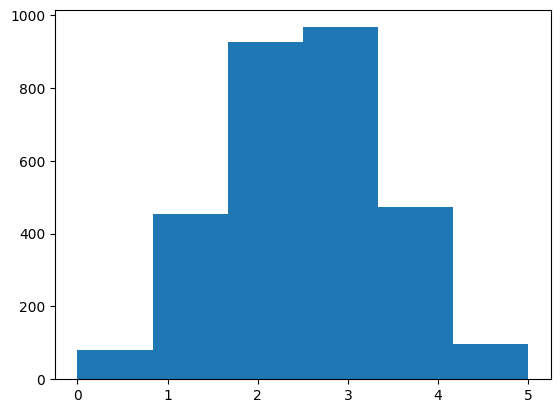

In [14]:
P, bars, _ = plt.hist(X, bins=k+1)

In [15]:
P = P/sum(P)
F = [sum(P[:i+1]) for i in range(k+1)]
print(F)

[np.float64(0.027), np.float64(0.17833333333333332), np.float64(0.487), np.float64(0.8093333333333333), np.float64(0.9673333333333334), np.float64(1.0)]


[np.float64(0.027), np.float64(0.17833333333333332), np.float64(0.487), np.float64(0.8093333333333333), np.float64(0.9673333333333334), np.float64(1.0)]
[0.03125, 0.1875, 0.5, 0.8125, 0.96875, 1.0]


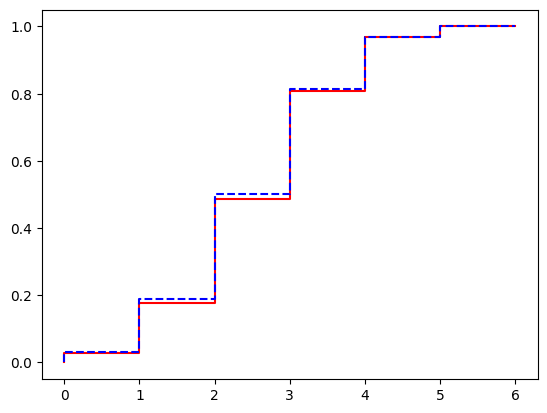

In [16]:
print(F)
print(Uk)
plt.step([i for i in range(k+2)], [0, *F], color="red")
plt.step([i for i in range(k+2)], [0, *Uk], color="blue", linestyle="dashed")

In [17]:
print(f"Статистика Колмогорова: {max([abs(uk-fk) for uk, fk in zip(Uk, F)]):.4f}")

Статистика Колмогорова: 0.0130


In [18]:
mx = np.mean(X)
s2 = np.mean([x*x for x in X]) - mx**2
mx_t = k*p
D = k*p*(1-p)
print(f"Выборочное среднее: {mx:.4f}, теоретическое среднее: {mx_t:.4f}, разность величин: {abs(mx-mx_t):.4f}")
print(f"Выборочная дисперсия: {s2:.4f}, теоретическая дисперсия: {D:.4f}, соотношение величин под корнем: {(s2/D)**0.5:.4f}")

Выборочное среднее: 2.5310, теоретическое среднее: 2.5000, разность величин: 0.0310
Выборочная дисперсия: 1.2257, теоретическая дисперсия: 1.2500, соотношение величин под корнем: 0.9902
